In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error


In [2]:
CENTRE = 13000
STD    = 10000
NUM_SAMPLES = 400_000

# Target

count    400000.000000
mean      13907.613966
std        8674.581227
min           0.179794
25%        6974.680668
50%       13128.017821
75%       19749.838674
max       58790.828104
dtype: float64


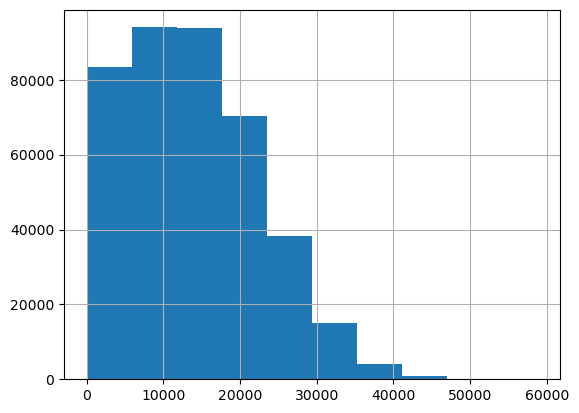

In [3]:
target = pd.Series(np.abs(np.random.normal(CENTRE, STD, NUM_SAMPLES))) # generate positive values
print(target.describe())
target.hist();

# Predict median

In [4]:
preds = pd.Series([target.median()]*target.shape[0])
preds.describe().round(1)

count    400000.0
mean      13128.0
std           0.0
min       13128.0
25%       13128.0
50%       13128.0
75%       13128.0
max       13128.0
dtype: float64

# MAPE test

In [5]:
def test(NUM_TO_EDIT):
    global NUM_SAMPLES
    MAPE_test = []
    for i in range(1,10):
        # edit first value in target dataset
        target.iloc[:NUM_TO_EDIT] = i
        MAPE_test += [mean_absolute_percentage_error(target, preds)]

    MAPE_test = pd.Series(MAPE_test, index=range(1,10))  
    MAPE_test.plot()
    plt.xlabel('Edited value of first target')
    plt.ylabel('MAPE')
    plt.show()
    print(MAPE_test.describe().round(3))
    print('\nRatio MAPE max/min', round(MAPE_test.max()/MAPE_test.min(), 3),
          '\nfor NUM_TO_EDIT =', NUM_TO_EDIT,
          '\nit\'s', round(NUM_TO_EDIT/NUM_SAMPLES*100, 3), '% of total samples count'
         )


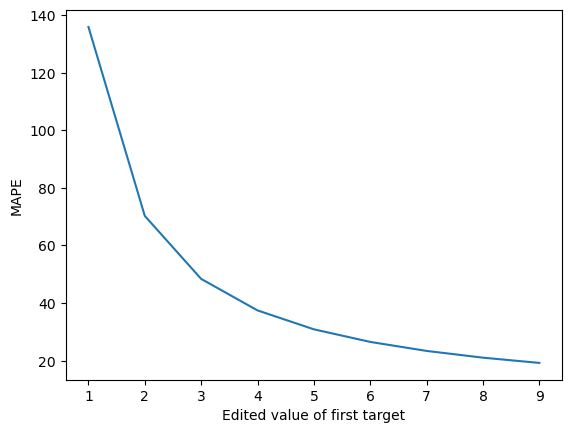

count      9.000
mean      45.881
std       37.436
min       19.203
25%       23.370
50%       30.872
75%       48.376
max      135.896
dtype: float64

Ratio MAPE max/min 7.077 
for NUM_TO_EDIT = 4000 
it's 1.0 % of total samples count


In [6]:
test(4000)